# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Matthew De Filippo

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TODO: Import dataset and inspect the first five columns
# Need to split the data based on tab characters. No header is provided.
df = pd.read_csv('seeds_dataset.txt', delimiter='\t', header=None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y.

# Take the last column as the target vector (kernel classification).
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

#### Response
I selected the Standard Scaler to transform the data such that for each feature the mean is 0 and the variance is 1. In this case, we do not need to ensure any particular minimum or maximum values for the data; we simply want to bring all of the variables into a similar range.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [5]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# TODO: Print the shape of the training feature matrix and target vector
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y: {y_train.shape}")

Shape of X_train: (168, 7)
Shape of y: (168,)


Now that we have our training data, we can implement our selected scaler.

In [7]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Implement the StandardScaler.
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [8]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [9]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [10]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters determined by the grid search.
print(f"Best Parameters: {grid_search.best_params_}")

# Print the cross validation score.
print(f"Best Cross Validation Score: {grid_search.best_score_}")

# Print the test score.
print(f"Test Score: {grid_search.score(X_test_scaled, y_test)}")

Best Parameters: {'C': 10.0, 'fit_intercept': True}
Best Cross Validation Score: 0.9467023172905525
Test Score: 0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [11]:
# TODO: Predict y labels using best estimator
y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [12]:
# TODO: Reduce dimensions of test data for plotting
# Implement Principal Component Analysis.
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

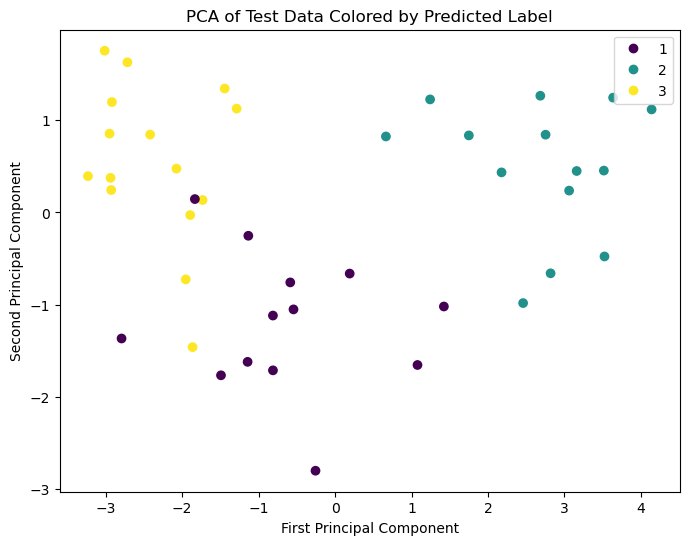

In [13]:
# TODO: Plot test points colored by predicted label
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred, cmap='viridis')
plt.title('PCA of Test Data Colored by Predicted Label')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y_pred))
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

#### Question 1 Response
The logistic regression model did work well for this dataset based on the training and testing scores achieved (approx. 0.95 each). These values are both close to the maximum of 1 and close together. We can therefore say that this model is exhibiting low bias and low variance.

#### Question 2 Response
Yes; PCA did work well for this model based on the above plot "PCA of Test Data Colored by Predicted Label". Each classification label is groups together relatively well except for a couple of the datapoints for class 1. Since both models used were linear (logistic regression and PCA), we can assume that this dataset is likely linear.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

#### Question 1 Response
I sourced my code based on the examples provided in the lecture notes (particularily Introduction to PCA and PCA Applications). I also referenced my previously completed assignments when performing some of the pre-processing required by this assignment.

#### Question 2 Response
I completed the steps in the suggested order (1->2->3->4->5). I felt that this was a logical and clear way to approach the problem.

#### Question 3 Response
I did not use generative AI to complete this section of the assignment.

#### Question 4 Response
Yes. I had some challenges getting the Grid Search to work. I went through my code thouroughly and noticed that I was using the incorrect attribute dataset in my scaler; changing that solved the issue.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [126]:
# TODO: Scale feature matrix

# This is the same process that was completed in Part 1 but is shown again here for reference.
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarn

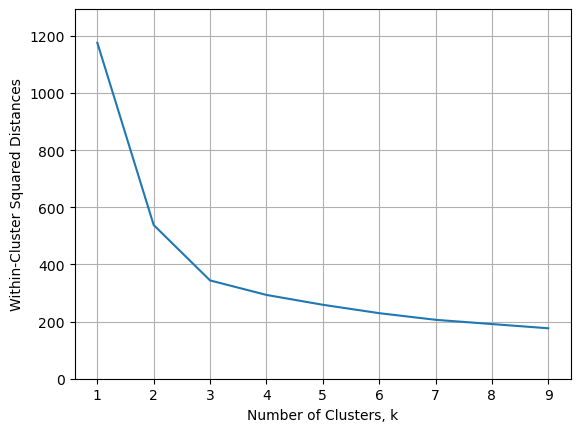

In [127]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_train_scaled)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of Clusters, k')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [128]:
# TODO: Implement K-means with the number of clusters determined in the previous step

# Based on the above plot, we see that the curve bends at k=3.
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_


C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [129]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette = silhouette_score(X_train_scaled, labels)
calinski_harabasz = calinski_harabasz_score(X_train_scaled, labels)
davies_bouldin = davies_bouldin_score(X_train_scaled, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Calinski-Harabasz Score: {calinski_harabasz}")
print(f"Davies-Bouldin Score: {davies_bouldin}")

Silhouette Score: 0.405678517383757
Calinski-Harabasz Score: 199.48443909591091
Davies-Bouldin Score: 0.9001871225512622


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

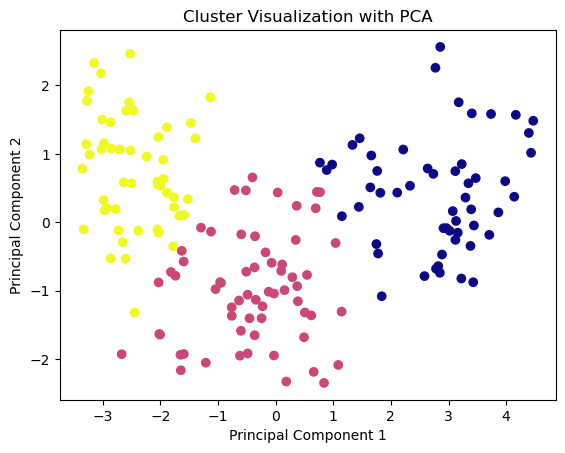

In [137]:
# TODO: Plot clustering results

# Use PCA to reduce to 2 dimensions.
pca = PCA(n_components=2)
pca.fit(X_train_scaled)
X_2D = pca.transform(X_train_scaled)

# Create and set the specifications for the scatter plot.
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='plasma')
plt.title('Cluster Visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [142]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()
pca.fit_transform(X_train_scaled)

# Calculate the explained variance ratio.
explained_variance_ratio = pca.explained_variance_ratio_

# Calculating the cumulative sum of explained variances.
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain at least 95% of the variance.
# Finds the index of the first element in the cumulative variance array that is greater than or equal to 0.95. 
n_95 = np.where(cumulative_variance >= 0.95)[0][0] + 1
print(f"Number of principal components to explain 95% variance: {n_95}")

Number of principal components to explain 95% variance: 3


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [143]:
# TODO: Use PCA to transform the data.
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)

In [144]:
# TODO: Implement K-means with the transformed data

pca = PCA(n_components = n_95)
X_train_pca = pca.fit_transform(X_train_scaled)

kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(X_train_pca)
labels = kmeans_pca.labels_


C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\matth\anaconda3\envs\ensf-ml\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [145]:
# TODO: Calculate the three different validation metrics
silhouette_pca = silhouette_score(X_train_pca, labels)
calinski_harabasz_pca = calinski_harabasz_score(X_train_pca, labels)
davies_bouldin_pca = davies_bouldin_score(X_train_pca, labels)

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [153]:
# TODO: Display results
results = pd.DataFrame({'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],'Original Data': [silhouette, calinski_harabasz, davies_bouldin],'PCA Transformed Data': [silhouette_pca, calinski_harabasz_pca, davies_bouldin_pca]
})

# Show the table of results.
results

,Metric,Original Data,PCA Transformed Data
0,Silhouette Score,0.405679,0.412358
1,Calinski-Harabasz Score,199.484439,208.196736
2,Davies-Bouldin Score,0.900187,0.879096


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*

#### Question 1 Response
Yes; the optimal number of clusters makes sense based on the context. This datasets tracks three different kernel types so there are three different classifications we are examining.

#### Question 2 Response
Yes. Based on the plots, we see that there are similar distributions for each of the three classes of kernels.

#### Question 3 Response
I used three components for the PCA analysis (as these three components could explain 95% of the variance). Yes, using PCA did improve my results as evidenced by the increase Silhouette and Calinski-Harabasz Scores and the decreased Davies-Bouldin Score shown in the table above.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

#### Question 1 Response
I sourced my code from the various clustering and dimensionality reduction examples provided in the lecture notes (specifically 'Finding_k', 'Introduction to PCA', and 'PCA Applications' as well as Lab 8. I modified the code to suit the requirements of this project.

#### Question 2 Response
I completed the steps in the order recommended by the assignment (1, 2, 3, 4, then 5).

#### Question 3 Response
I did not use generative AI to complete this assignment.

#### Question 4 Response
I had some issues using the elbow method to determine the optimal number of clusters. I originally thought that based on the plot, perhaps we should take k=2 because that is where the plot sharply turns. However, after doing some research on the elbow method (and realizing the number of clusters should likely match the number of classes in this case), I took k=3. 

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


#### Response
I liked the opportunity to use different unsupervised learning methods and apply the concepts learned in the latter half of the course. I found some of the code sequences for unsupervised learning a bit confusing at first but reviewing the lecture notes and examples I was able to complete the project requirements.